In [1]:
import numpy as np
arr_4x4 = np.random.exponential(scale=1.0, size=(4,4))
print(arr_4x4)


[[1.18116175 0.84123804 0.46208459 2.39928326]
 [3.97807561 2.35703078 0.06076528 0.29844745]
 [2.92482228 0.99185498 1.27201893 0.1355405 ]
 [0.77298157 3.77022645 1.14827118 0.75355337]]


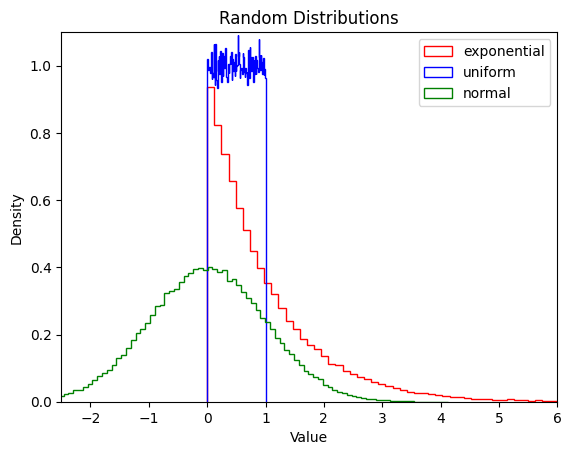

In [2]:
import matplotlib.pyplot as plt

exp_data = np.random.exponential(scale=1.0, size=(100000,))
uniform_data = np.random.rand(100000)
normal_data = np.random.randn(100000)

plt.hist(exp_data, density=True, bins=100, histtype="step", color="red", label="exponential")
plt.hist(uniform_data, density=True, bins=100, histtype="step", color="blue", label="uniform")
plt.hist(normal_data, density=True, bins=100, histtype="step", color="green", label="normal")
plt.axis([-2.5, 6, 0, 1.1])
plt.legend(loc="upper right")
plt.title("Random Distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


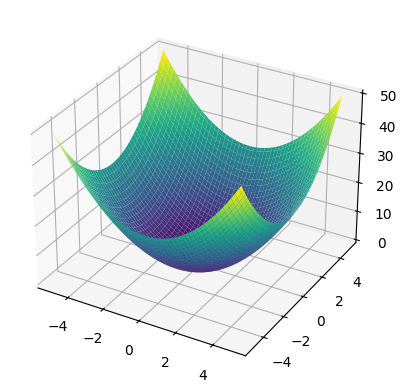

In [3]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()


In [8]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

!wget -q https://elitedatascience.com/wp-content/uploads/2022/07/Pokemon.csv
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='latin')
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total
HP,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939,0.576591
Attack,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701,0.670939
Defense,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252,0.508694
Sp. Atk,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516,0.680745
Sp. Def,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656,0.774383
Speed,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000,0.506950
Total,0.576591,0.670939,0.508694,0.680745,0.774383,0.506950,1.000000


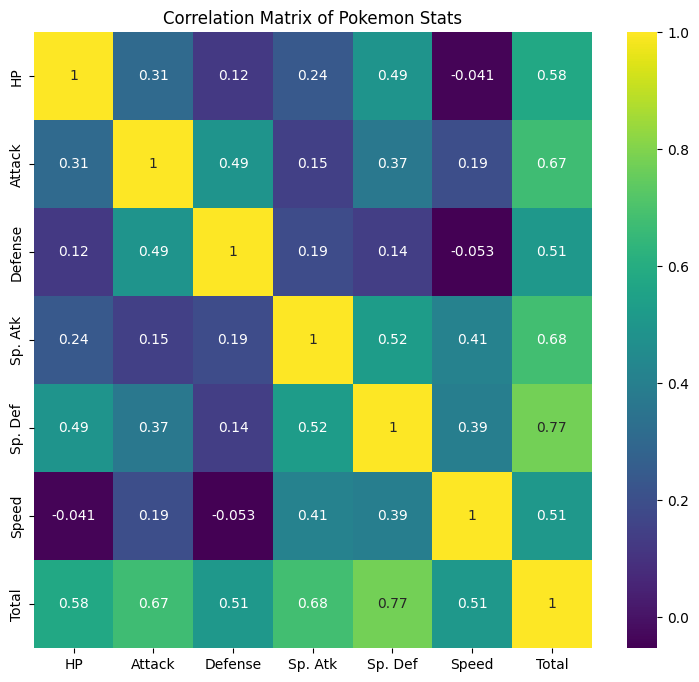

In [9]:
# Select the columns for statistical analysis
stats_df = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']]

# Calculate the correlation matrix
corr = stats_df.corr()

# Display the correlation matrix
display(corr)

# Plot the heatmap
plt.figure(figsize=(9,8))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Correlation Matrix of Pokemon Stats')
plt.show()

In [11]:
#Task 2
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load your CSV file from Google Drive
file_path = "/content/drive/MyDrive/Au_nanoparticle_dataset.csv"
df = pd.read_csv(file_path)

# Select the required columns
new_df = df[["N_total", "N_bulk", "N_surface", "R_avg"]]

# Show first 20 rows
print(new_df.head(20))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    N_total  N_bulk  N_surface    R_avg
0      1599    1014        585  17.3706
1      1642    1034        608  17.6061
2      4637    3365       1272  25.3692
3      7189    5292       1897  29.7011
4     11004    8508       2496  34.2831
5     13375   10768       2607  36.6334
6     13795   11155       2640  37.0108
7     13947   11304       2643  37.1672
8     14020   11357       2663  37.2103
9     14056   11389       2667  37.2467
10     1534     966        568  17.1107
11     1559     974        585  17.2101
12     4356    3099       1257  24.8253
13     6550    4675       1875  29.0376
14    10175    7748       2427  33.4399
15    12393    9842       2551  35.6950
16    13207   10590       2617  36.4657
17    13543   10937       2606  36.7871
18    13713   11079       2634  36.9333
19    13791   11151       2640  37.0104


In [12]:
stats = new_df.describe().loc[["mean", "std", "25%", "50%", "75%"]]
print(stats)


          N_total       N_bulk   N_surface      R_avg
mean  3476.786500  2521.550250   955.23625  20.654363
std   3679.286769  2976.232459   721.87022   7.610716
25%   1061.000000   618.750000   437.00000  15.160725
50%   1867.000000  1199.000000   666.00000  18.629250
75%   4503.000000  3183.000000  1301.75000  25.525125


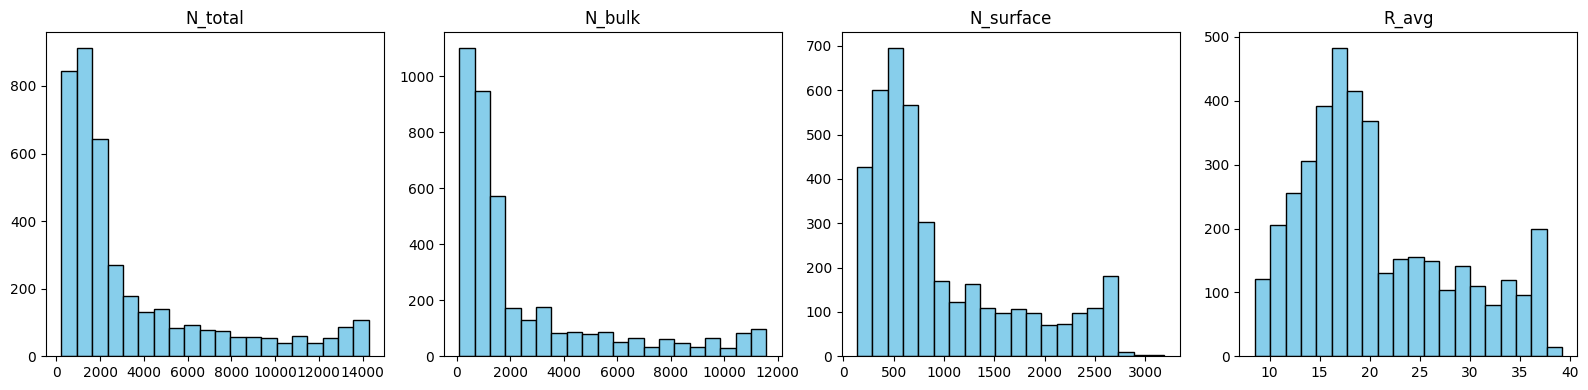

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(16,4))
for idx, col in enumerate(new_df.columns):
    axes[idx].hist(new_df[col], bins=20, color='skyblue', edgecolor='black')
    axes[idx].set_title(col)
plt.tight_layout()
plt.show()


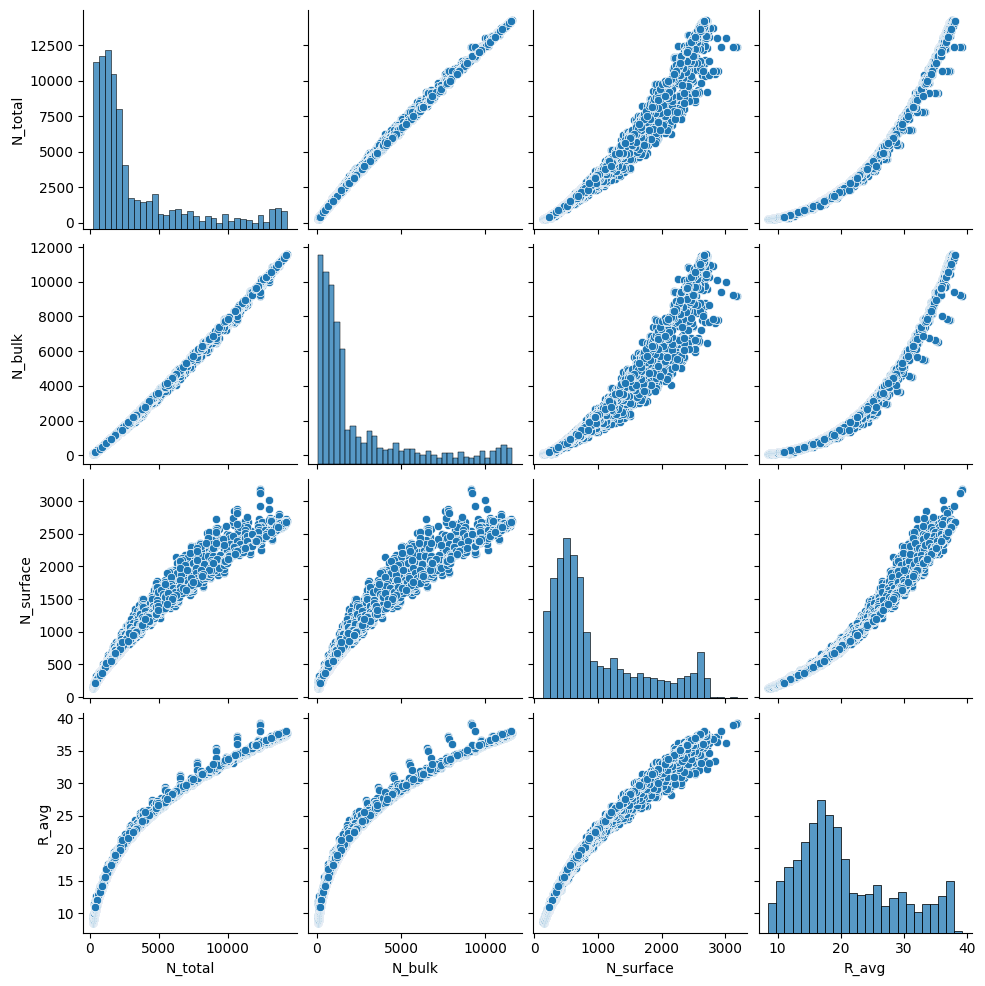

In [14]:
sns.pairplot(new_df)
plt.show()


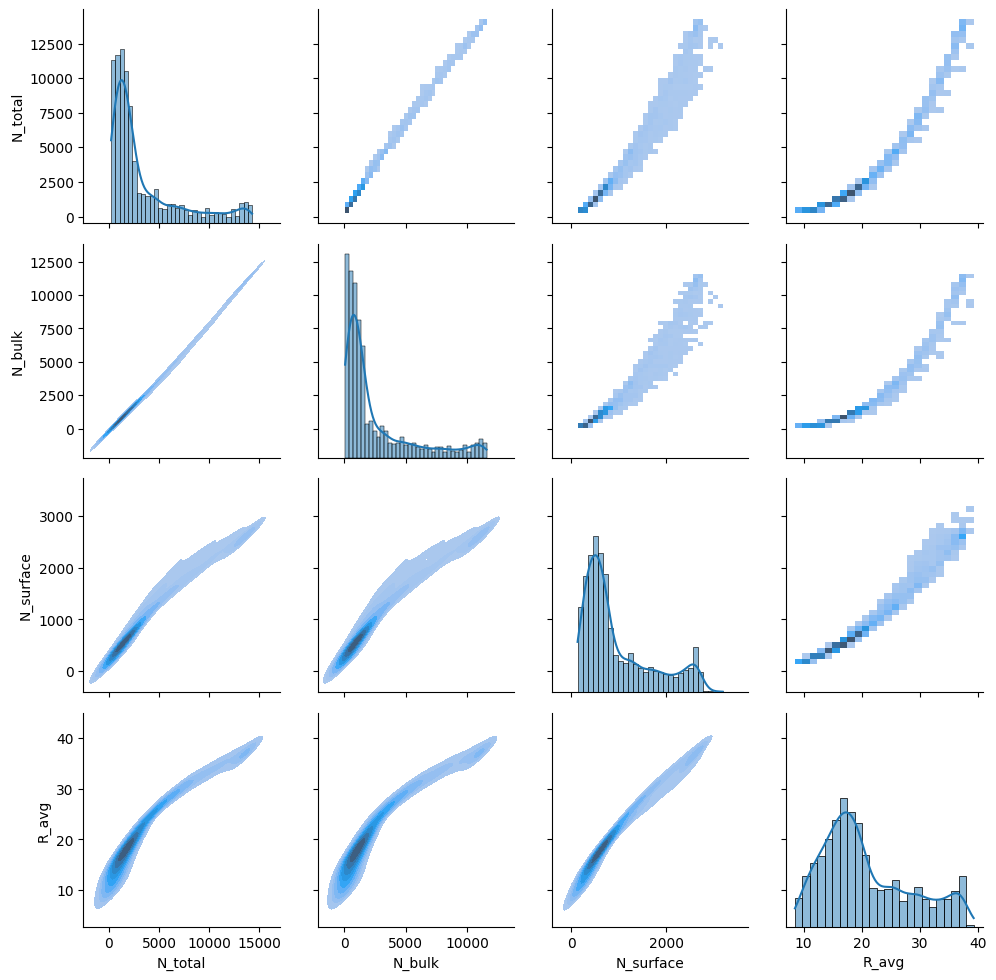

In [15]:
g = sns.PairGrid(new_df)
g.map_upper(sns.histplot)  # bivariate histogram
g.map_diag(sns.histplot, kde=True)  # histogram + KDE
g.map_lower(sns.kdeplot, fill=True)  # bivariate KDE
